# GRIP @ The Sparks Foundation  



# TASK 1 : PREDICTION USING SUPERVISED ML

# PROBLEM STATEMENT : Prediction of percentage of a student based on number of study hours using linear regression.


DATASET LINK : http://bit.ly/w-data

In [109]:
# Importing libraries
library(dplyr)
library(ggplot2)

In [110]:
# Import the dataset
student <- read.csv("dataset.csv")
glimpse(student)

Observations: 25
Variables: 2
$ Hours  <dbl> 2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, ...
$ Scores <int> 21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, ...


In [111]:
# View the dataset
head(student,25)

Hours,Scores
2.5,21
5.1,47
3.2,27
8.5,75
3.5,30
1.5,20
9.2,88
5.5,60
8.3,81
2.7,25


In [112]:
# To check if there are any missing values in the dataset
colSums(is.na(student))

Hours Scores 
     0      0

In [113]:
# As there is no missing data , no cleaning of dataset is required.
# let us see the statistics of data
summary(student)

     Hours           Scores     
 Min.   :1.100   Min.   :17.00  
 1st Qu.:2.700   1st Qu.:30.00  
 Median :4.800   Median :47.00  
 Mean   :5.012   Mean   :51.48  
 3rd Qu.:7.400   3rd Qu.:75.00  
 Max.   :9.200   Max.   :95.00  

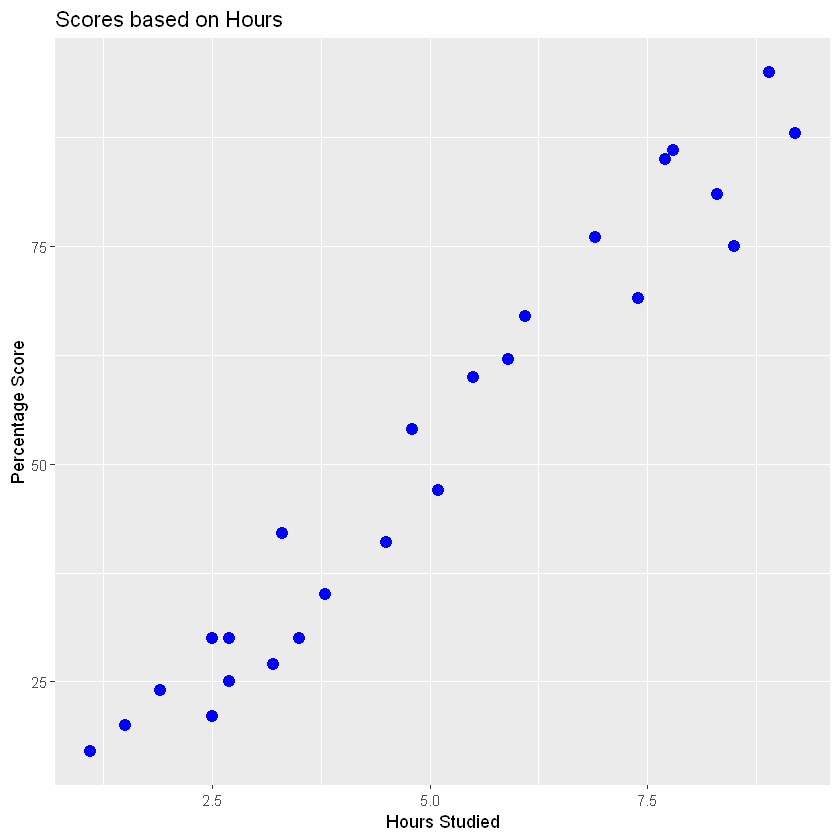

In [114]:
# Let us plot the data to find a relationship between the variables in dataset
ggplot(student, aes(x = Hours, y = Scores)) + geom_point(size=3,color="blue") + labs(title="Scores based on Hours",
       x= "Hours Studied", y = "Percentage Score") + scale_y_continuous()

In [115]:
# From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score
# Let us check how strongly are they correlated
summarize(student,cor(Hours,Scores))

"cor(Hours, Scores)"
0.9761907


# Applying Linear Regression

First we need to split the dataset into training and testing sets

In [127]:
n <- nrow(student)
target <- round(.75 * n)

# gp is vector of uniform random numbers

gp <- runif(n)
train <- student[gp<0.75,]
test <- student[gp>=0.75,]

# check no. of rows after splitting
nrow(train)
nrow(test)

[1] 19

[1] 6

In [128]:
head(train)

,Hours,Scores
1,2.5,21
2,5.1,47
3,3.2,27
4,8.5,75
5,3.5,30
8,5.5,60


In [129]:
head(test)

,Hours,Scores
6,1.5,20
7,9.2,88
14,3.3,42
16,8.9,95
19,6.1,67
24,6.9,76


In [130]:
# Now we will train our dataset
model <- lm(Scores ~ Hours, data = train)
summary(model)


Call:
lm(formula = Scores ~ Hours, data = train)

Residuals:
   Min     1Q Median     3Q    Max 
-9.257 -4.433 -1.310  4.467  8.557 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.5103     2.9254   0.516    0.612    
Hours         9.7349     0.5596  17.396 2.89e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.556 on 17 degrees of freedom
Multiple R-squared:  0.9468,	Adjusted R-squared:  0.9437 
F-statistic: 302.6 on 1 and 17 DF,  p-value: 2.886e-12


# Making Predictions

In [131]:
# Predicting the scores based on our model
Predict_scores <- predict(model,train)

# Comparing with actual scores
train %>%
mutate(Predicted_Scores = Predict_scores)


Hours,Scores,Predicted_Scores
2.5,21,25.84767
5.1,47,51.15853
3.2,27,32.66214
8.5,75,84.25734
3.5,30,35.58262
5.5,60,55.05251
8.3,81,82.31036
2.7,25,27.79466
7.7,85,76.46939
5.9,62,58.94649


In [132]:
# Performance of this model on test data
Predict_scores <- predict(model,test)

# Comparing with actual scores
test %>%
mutate(Predicted_Scores = Predict_scores)

Hours,Scores,Predicted_Scores
1.5,20,16.11273
9.2,88,91.07181
3.3,42,33.63563
8.9,95,88.15132
6.1,67,60.89348
6.9,76,68.68143


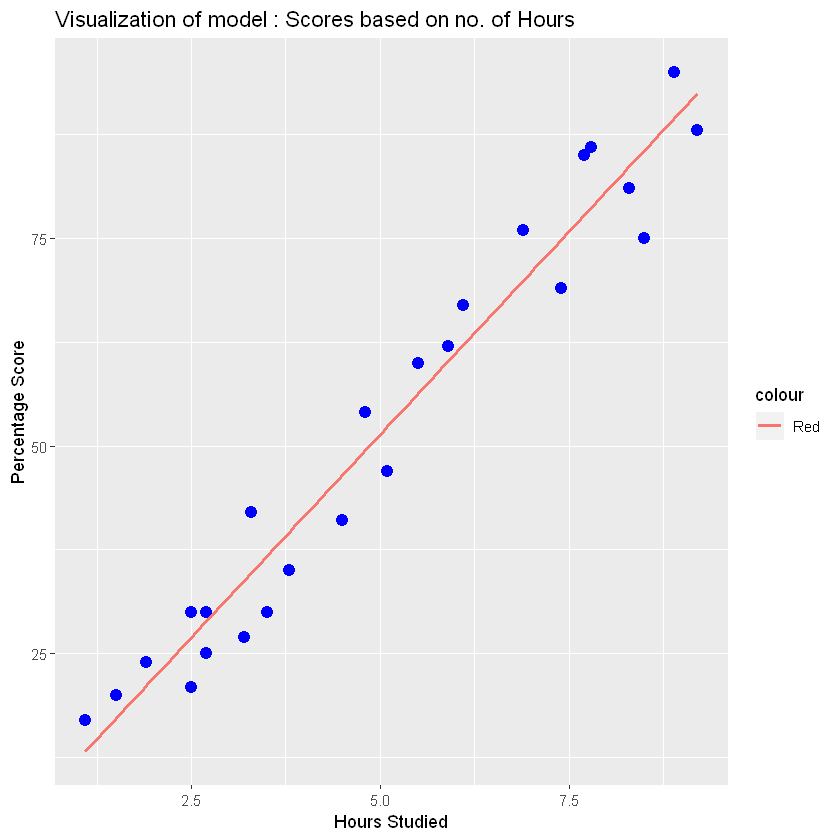

In [133]:
# Let us plot regression line to validate that our model fits well for the dataset
ggplot(student, aes(x = Hours, y = Scores)) + geom_point(size=3,color="blue") + geom_smooth(method = "lm",aes(color = "Red"),
se = FALSE)+ 
labs(title="Visualization of model : Scores based on no. of Hours", x= "Hours Studied", y = "Percentage Score") + 
scale_y_continuous()

In [134]:
# We need to find percentage of student if he studies 9.25 hours a day
test.score <- data.frame(Hours = 9.25)
test.score

Hours
9.25


In [135]:
result <- predict(model, test.score)

test.score %>%
mutate(Predicted_Score = result)

Hours,Predicted_Score
9.25,91.55855


According to our model, if a student studies 9.25 hours a day , he will score 93.53 % approximately.

# Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error.

In [137]:
library(Metrics) 
result = rmse(test$Scores, Predict_scores)
print(result)

[1] 6.221803


Root mean square error for this model is 6.22